In [1]:
import pandas as pd, numpy as np
from rdkit import Chem

In [2]:
from scipy import stats

In [3]:
import pandas as pd, numpy as np, re, os
from evaluation import Evaluator, compilerPatterns, ResultsFromMeanStdDF
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 12})

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
paths = [ os.path.join(dataset.name, experiment.name) 
         for dataset in os.scandir('experiments') if dataset.is_dir() and 'grisoni' in dataset.name 
         for experiment in os.scandir(dataset.path)  ]

In [6]:
evaluators = [Evaluator(path, novel=True) for path in paths]

In [7]:
scaffDFs=pd.concat( [evaluator.getScaffoldResults() for evaluator in evaluators if not evaluator.gens.empty], ignore_index=True)

[19:00:45] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[19:00:45] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
[19:01:17] Explicit valence for atom # 8 C greater than permitted


<evaluation.SampledMoleculesSm object at 0x7fbd16a57c50> Explicit valence for atom # 8 C greater than permitted


[19:04:08] Explicit valence for atom # 0 C greater than permitted


<evaluation.SampledMoleculesSm object at 0x7fbd09c99c10> Explicit valence for atom # 0 C greater than permitted


In [8]:
scaffDFs['unique%']=scaffDFs['unique']/scaffDFs['total']
scaffDFs['novel%']=scaffDFs['novel']/scaffDFs['unique']
scaffDFs['chiral%']=scaffDFs['chiral']/scaffDFs['novel']

In [9]:
scaffGrp=scaffDFs.fillna(-1).groupby(compilerPatterns.index.drop('fold').tolist(),as_index=True, dropna=False)

/tmp/ipykernel_1141590/2999511724.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  scaffGrp=scaffDFs.fillna(-1).groupby(compilerPatterns.index.drop('fold').tolist(),as_index=True, dropna=False)


In [10]:
scaffStats=scaffGrp.describe().loc(axis=1)[ ( slice(None),['mean','std'] ) ].drop(columns='fold')

In [11]:
scaffStats=ResultsFromMeanStdDF(scaffStats)

In [12]:
scaffStats.query(' ( aug==5 and hl==2 and hu==512 and bs==256 ) or ( aug!=5 and hl==2 and hu==512 and bs==512 ) ')

total  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                   
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0  5964.0 ± 6.0   
            SMILES     2  512 -1   0.001 512 6000   10    1.0  5976.0 ± 8.0   
            fragSMILES 2  512  300 0.001 512 6000   16    1.0  5985.0 ± 8.0   
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0  5978.0 ± 6.0   
            SMILES     2  512 -1   0.001 256 6000   3     1.0  5976.0 ± 5.0   
            fragSMILES 2  512  300 0.001 256 6000   4     1.0  5978.0 ± 7.0   

                                                                      unique  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                    
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0  5570.0 ± 40.0   
            SMILES     2  512 -1   0.001 512 6000   10    1.0  5490.0 ± 80.0   
            fragSMILES 2  512  300 0.001 512 6000   16    1.0  5500.0 ± 50.0   
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0  5620.0 ± 40.0   
            SMILES     2  512 -1   0.001 256 6000   3     1.0  5610.0 ± 70.0   
            fragSMILES 2  512  300 0.001 256 6000   4     1.0  5510.0 ± 80.0   

                                                                        novel  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                     
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0   5160.0 ± 70.0   
            SMILES     2  512 -1   0.001 512 6000   10    1.0  4600.0 ± 100.0   
            fragSMILES 2  512  300 0.001 512 6000   16    1.0   4440.0 ± 70.0   
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0   5240.0 ± 60.0   
            SMILES     2  512 -1   0.001 256 6000   3     1.0  5000.0 ± 100.0   
            fragSMILES 2  512  300 0.001 256 6000   4     1.0  4400.0 ± 100.0   

                                                                       chiral  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                     
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0    760.0 ± 40.0   
            SMILES     2  512 -1   0.001 512 6000   10    1.0    820.0 ± 40.0   
            fragSMILES 2  512  300 0.001 512 6000   16    1.0    750.0 ± 50.0   
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0    870.0 ± 60.0   
            SMILES     2  512 -1   0.001 256 6000   3     1.0  1000.0 ± 100.0   
            fragSMILES 2  512  300 0.001 256 6000   4     1.0    830.0 ± 80.0   

                                                                     unique%  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                    
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0  0.934 ± 0.007   
            SMILES     2  512 -1   0.001 512 6000   10    1.0    0.92 ± 0.01   
            fragSMILES 2  512  300 0.001 512 6000   16    1.0  0.918 ± 0.007   
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0  0.941 ± 0.006   
            SMILES     2  512 -1   0.001 256 6000   3     1.0    0.94 ± 0.01   
            fragSMILES 2  512  300 0.001 256 6000   4     1.0    0.92 ± 0.01   

                                                                      novel%  \
dataset aug notation   hl hu  es   lr    bs  amount epoch T                    
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    1.0  0.925 ± 0.006   
            SMILES     2  512 -1   0.001 512 6000   10    1.0  0.838 ± 0.009   
            fragSMILES 2  512  300 0.001 512 6000   16    1.0  0.809 ± 0.007   
         5  SELFIES    2  512 -1   0.001 256 6000   3     1.0  0.931 ± 0.004   
            SMILES     2  512 -1   0.001 256 6000   3     1.0     0.9 ± 0.01   
            fragSMILES 2  512  300 0.001 256 6000   4     1.0    0.81 ± 0.01   

                                                                     chiral%  
dataset aug notation   hl hu  es   lr    bs  amount epoch T                   
grisoni -1  SELFIES    2  512 -1   0.001 512 6000   10    

In [ ]:
scaffStats.to_csv('results/08_grisoniScaffMetrics.csv')

In [13]:
params=[2,512,-1,0.001,512,6000,10,1.0]
paramsFrag = [2,512,300,0.001,512,6000,16,1.0]

In [14]:
params5=[2,512,-1,0.001,256,6000,3,1.0]
paramsFrag5 = [2,512,300,0.001,256,6000,4,1.0]

In [15]:
genPvals = pd.DataFrame.from_dict(
                {notation+'x1': 
                {metric:stats.ttest_ind(
                scaffGrp.get_group(('grisoni',-1,notation,*params))[metric],
                scaffGrp.get_group(('grisoni',-1,'fragSMILES',*paramsFrag))[metric],
                ).pvalue for metric in scaffStats.columns} for notation in ['SMILES','SELFIES']
                } |
                {notation+'x5': 
                {metric:stats.ttest_ind(
                scaffGrp.get_group(('grisoni',5,notation,*params5))[metric],
                scaffGrp.get_group(('grisoni',5,'fragSMILES',*paramsFrag5))[metric],
                ).pvalue for metric in scaffStats.columns} for notation in ['SMILES','SELFIES']
                }
                , orient='index'
            )

In [16]:
genPvals

,total,unique,novel,chiral,unique%,novel%,chiral%
SMILESx1,0.122287,0.883691,2.905847e-02,0.042347,0.966772,3.886867e-04,0.125945
SELFIESx1,0.001574,0.034050,2.212652e-07,0.642110,0.007221,3.270683e-09,0.005719
SMILESx5,0.544191,0.070134,1.120501e-04,0.116053,0.064472,4.878120e-06,0.846064
SELFIESx5,1.000000,0.017568,2.491563e-06,0.417392,0.017827,9.042331e-08,0.042876


In [17]:
genPvals.map(lambda x: x<0.05)

,total,unique,novel,chiral,unique%,novel%,chiral%
SMILESx1,False,False,True,True,False,True,False
SELFIESx1,True,True,True,False,True,True,True
SMILESx5,False,False,True,False,False,True,False
SELFIESx5,False,True,True,False,True,True,True


## Count how many scaffolds are novel cause of new cyclic fragments

In [18]:
from ast import literal_eval
notations = ['SELFIES','SMILES','fragSMILES']
def _converting(cell):
    if cell.startswith('(') :
        return literal_eval(cell)

In [19]:
from processer import fragmentSmilesList

In [54]:
def checkScaffoldFragments(scaffolds, vocab):

    def checkNewFrag(smi, frags):
        if pd.isnull(frags):
            if smi in vocab:
                return False
            return True

        mask = np.in1d(frags, vocab)

        newFrags = np.where(~mask)[0]

        if len(newFrags)==0:
            return False
        
        ## If u want track which new fragments are
        # return np.array(frags)[newFrags]
        return True
    
    # try:
    fragScaff=fragmentSmilesList(scaffolds)
    maskNewFrags=fragScaff.apply(lambda x: checkNewFrag(x.smiles, x.tokens), axis=1)

    return maskNewFrags.sum()
    # except:
    #     return -1

In [21]:
vocabs=[]
for fold in range(5):
    train_data = pd.read_csv(f'experiments/data/grisoni_train_{fold}.tar.xz', usecols = ['fragsmiles'], compression="xz",converters={'fragsmiles': _converting} ).squeeze()
    vocabs.append(np.unique(np.concatenate(train_data.apply(np.array))))

In [22]:
def countNewScaffCauseFrags(evaluator):
    results = evaluator.gens.copy()

    results['inducedNewFrags']=results.apply(lambda x: checkScaffoldFragments(x.sampled.novelScaff, vocabs[x.fold]), axis=1)

    results.drop(columns='sampled', inplace=True)
    return results.sort_values(['amount','fold','epoch'])

In [ ]:
idxsEvaluators = np.unique(scaffDFs.query(' ( aug==5 and hl==2 and hu==512 and bs==256 and notation!="fragSMILES" ) or ( aug!=5 and hl==2 and hu==512 and bs==512 and notation!="fragSMILES") ').index//5)

In [ ]:
inducedNewFrags=pd.concat( [ countNewScaffCauseFrags(evaluators[idx]) for idx in idxsEvaluators], ignore_index=True)

In [84]:
induced = scaffDFs.query(' ( aug==5 and hl==2 and hu==512 and bs==256 and notation!="fragSMILES" ) or ( aug!=5 and hl==2 and hu==512 and bs==512 and notation!="fragSMILES" ) ').merge(inducedNewFrags, 
on=compilerPatterns.index.tolist())

In [86]:
induced['inducedNewFrags%']=induced['inducedNewFrags']/induced['novel']

In [87]:
inducedGrp=induced.fillna(-1).groupby(compilerPatterns.index.drop('fold').tolist(),as_index=True, dropna=False)

/tmp/ipykernel_1141590/238393982.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  inducedGrp=induced.fillna(-1).groupby(compilerPatterns.index.drop('fold').tolist(),as_index=True, dropna=False)


In [88]:
inducedStats=inducedGrp.describe().loc(axis=1)[ ( slice(None),['mean','std'] ) ].drop(columns='fold')

In [89]:
inducedStats=ResultsFromMeanStdDF(inducedStats)

In [ ]:
inducedStats

## Describe Scaffs

In [ ]:
from rdkit import Chem
from rdkit.Chem import RDConfig
from rdkit.Chem import Descriptors
from matplotlib import pyplot as plt
import os
import sys
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))

import sascorer

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
descs = dict(
    logP=Descriptors.MolLogP,
    qed=Descriptors.qed,
    sa=sascorer.calculateScore,
    weight=Chem.rdMolDescriptors.CalcExactMolWt,
    morgan1=Descriptors.FpDensityMorgan1,
    morgan3=Descriptors.FpDensityMorgan3,
    morgan2=Descriptors.FpDensityMorgan2,
)

In [ ]:
allChirScaffDF=joinMultipleDF(
     *list( zip(*[
         [ pd.concat([ sampl.chirScaff for sampl in evaluator.gens['sampled']], ignore_index=True, axis=0).drop_duplicates(), evaluator.dataInfo['notation']  ]
    for evaluator in evaluators if not evaluator.dataInfo['aug'] and evaluator.params['hl']==2 and evaluator.params['hu']==512 and evaluator.params['bs']==512 and not evaluator.gens.empty
    ])
))

In [ ]:
allChirScaffDF["molScaff"]=allChirScaffDF.index.map(Chem.MolFromSmiles)

In [ ]:
for name,fn in descs.items():
    allChirScaffDF[name]=allChirScaffDF["molScaff"].apply(fn)

In [ ]:
pcascaff = PCA(n_components=2)
pcscaff = StandardScaler().fit_transform(allChirScaffDF[descs.keys()])
allChirScaffDF = pd.concat([allChirScaffDF, pd.DataFrame(pcascaff.fit_transform(pcscaff), columns=["PC1","PC2"], index=allChirScaffDF.index ) ],axis=1)

In [ ]:
allChirScaffDF

,SELFIES,SMILES,fragSMILES,molScaff,logP,qed,sa,weight,morgan1,morgan3,morgan2,PC1,PC2
smiles,,,,,,,,,,,,,
B(OCCOCC1CCCOCC1)[C@@H]1CCCN1,True,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fa58fdd2f80>,0.89730,0.541646,4.271427,255.200574,1.111111,3.000000,2.111111,-2.270988,0.647369
B(OCc1ccccc1)[C@@H]1CCCN1,True,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fa58fdd2c00>,1.26420,0.719694,3.702151,189.132495,1.357143,2.928571,2.214286,-3.371790,-0.329465
B1CCN[CH]C2CCC[C@@H]12,True,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fa58fdd3060>,1.19479,0.493010,5.917750,136.129755,1.400000,3.400000,2.400000,-4.702006,2.015127
B1OCc2cc(CC3C[C@H](N4CCCCC4)N3)ccc21,True,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fa58fdd26c0>,0.91000,0.826266,4.438284,270.190344,1.250000,2.950000,2.100000,-2.968894,0.079675
C(#CC(N=CN1CCC2C3C=CC[C@@H](CC3)C21)c1cncnc1)C1CC1,True,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fa58fdd25e0>,3.63600,0.363119,5.817045,346.215747,1.153846,2.884615,2.038462,-1.116357,2.776276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
c1ncnc([C@@H]2C[C@H]2CN2CCOCC2)n1,True,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fa58921ec70>,0.30730,0.733364,3.568648,220.132411,1.250000,2.750000,2.000000,-2.520667,-0.802732
c1nn(CCCCC2CCCCC2)c2c1C[C@H]1C[C@@H]21,NaN,NaN,True,<rdkit.Chem.rdchem.Mol object at 0x7fa58921ece0>,4.29330,0.720240,3.429659,258.209599,1.157895,2.947368,2.052632,-1.591616,-0.038347
c1nnc(-c2ccc([C@H]3CCCCO3)cc2)s1,NaN,True,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fa58921ed50>,3.44670,0.813745,2.872151,246.082684,1.176471,2.705882,2.058824,-1.592531,-1.009348


In [ ]:
pcascaff.explained_variance_ratio_

array([0.5308354 , 0.22871271])

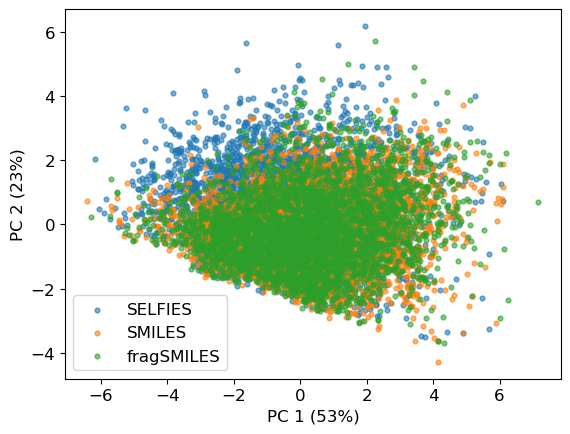

In [ ]:
# filtered = pcscaff[pcscaff.scaff.str.contains("@", regex=False)]
# grps = filtered.groupby("set")
# grpTrain = grps.get_group("training")

notations = ['SELFIES','SMILES','fragSMILES']
PCs = allChirScaffDF[["PC1","PC2"]]
scaffNotations = allChirScaffDF[notations]

# plt.scatter(*xy.values, s = 9,color="grey")

for i,notation in enumerate(notations[:2]):
    filter = [np.nan,np.nan,np.nan]
    filter[i]=True
    mask=(scaffNotations==filter).any(axis=1)
    # grpGen = grps.get_group(f"generated{seed}")

    xy = PCs[mask].T
    plt.scatter(*xy.values, s = 12, alpha=.6, label=notation)

plt.xlabel("PC 1 (53%)")
plt.ylabel("PC 2 (23%)")
plt.legend()
fig =plt.gcf()